# Classification Data Science problem

### Problem statement

• Subsidy Inc. delivers subsidies to individuals based on their income
• Accurate income data is one of the hardest piece of data to obtain across the world
• Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters

### Subsidy Inc. wishes us to:

Develop an income classifier system for individuals

### The Objective is to:

Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.


                            ### Insights and model's performace will given at the last ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
income_data = pd.read_csv('./income.csv', na_values=[' ?'])

In [3]:
income_data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


# Data cleaning, Handling missing values

In [4]:
income_data.index

RangeIndex(start=0, stop=31978, step=1)

In [5]:
income_data.shape

(31978, 13)

In [6]:
income_data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [7]:
income_data.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [8]:
income_data.memory_usage()

Index               128
age              255824
JobType          255824
EdType           255824
maritalstatus    255824
occupation       255824
relationship     255824
race             255824
gender           255824
capitalgain      255824
capitalloss      255824
hoursperweek     255824
nativecountry    255824
SalStat          255824
dtype: int64

In [9]:
for col in income_data.columns:
    if col in ['JobType']:
        continue
    print('col {} type: {}'.format(col, np.unique(income_data[col])), '\n')

col age type: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90] 

col EdType type: [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college'] 

col maritalstatus type: [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed'] 



TypeError: '<' not supported between instances of 'str' and 'float'

In [10]:
for col in income_data.columns:
    if col in ['age', 'capitalgain', 'capitalloss', 'hoursperweek']:
        continue
    income_data[col] = income_data[col].astype('category')

In [11]:
income_data.dtypes

age                 int64
JobType          category
EdType           category
maritalstatus    category
occupation       category
relationship     category
race             category
gender           category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
nativecountry    category
SalStat          category
dtype: object

In [12]:
income_data.memory_usage()

Index               128
age              255824
JobType           32342
EdType            32662
maritalstatus     32334
occupation        32646
relationship      32198
race              32190
gender            32102
capitalgain      255824
capitalloss      255824
hoursperweek     255824
nativecountry     33378
SalStat           32102
dtype: int64

In [13]:
income_data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [14]:
income_data.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [15]:
missing_df = income_data[income_data.isna().any(axis = 1)]

In [16]:
missing_df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [17]:
income_data['JobType'].value_counts().index[0]

' Private'

In [18]:
income_data['occupation'].value_counts().index[0]

' Prof-specialty'

In [19]:
income_data['JobType'].fillna(income_data['JobType'].value_counts().index[0], inplace=True)

In [20]:
income_data['occupation'].fillna(income_data['occupation'].value_counts().index[0], inplace=True)

In [21]:
income_data[income_data.isna().any(axis = 1)]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat


In [22]:
income_data.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [23]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            31978 non-null  int64   
 1   JobType        31978 non-null  category
 2   EdType         31978 non-null  category
 3   maritalstatus  31978 non-null  category
 4   occupation     31978 non-null  category
 5   relationship   31978 non-null  category
 6   race           31978 non-null  category
 7   gender         31978 non-null  category
 8   capitalgain    31978 non-null  int64   
 9   capitalloss    31978 non-null  int64   
 10  hoursperweek   31978 non-null  int64   
 11  nativecountry  31978 non-null  category
 12  SalStat        31978 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.3 MB


# Exploratory data analysis and Data visualization

In [24]:
copy = income_data.copy(deep = True)

In [25]:
copy

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [26]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            31978 non-null  int64   
 1   JobType        31978 non-null  category
 2   EdType         31978 non-null  category
 3   maritalstatus  31978 non-null  category
 4   occupation     31978 non-null  category
 5   relationship   31978 non-null  category
 6   race           31978 non-null  category
 7   gender         31978 non-null  category
 8   capitalgain    31978 non-null  int64   
 9   capitalloss    31978 non-null  int64   
 10  hoursperweek   31978 non-null  int64   
 11  nativecountry  31978 non-null  category
 12  SalStat        31978 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.3 MB


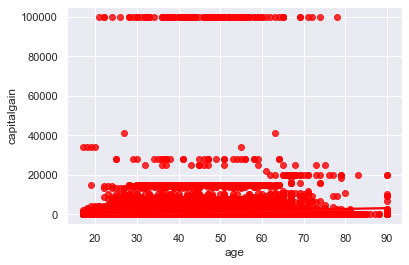

In [27]:
sns.set(style = 'darkgrid')
sns.regplot(x = 'age',
            y = 'capitalgain',
            data = copy,
            color = 'red')

plt.show()

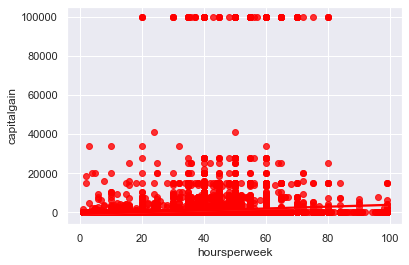

In [28]:
sns.set(style = 'darkgrid')
sns.regplot(x = 'hoursperweek',
            y = 'capitalgain',
            data = copy,
            color = 'red')

plt.show()

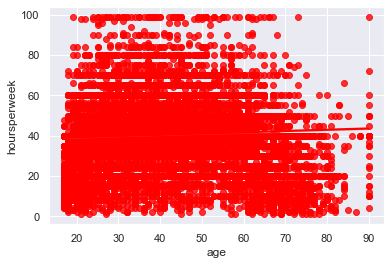

In [29]:
sns.set(style = 'darkgrid')
sns.regplot(x = 'age',
            y = 'hoursperweek',
            data = copy,
            color = 'red')

plt.show()

<AxesSubplot:xlabel='SalStat', ylabel='count'>

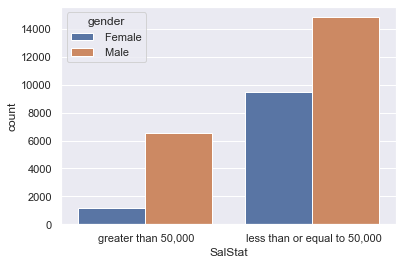

In [30]:
sns.countplot(x = 'SalStat',
              hue = 'gender',
              data = copy)

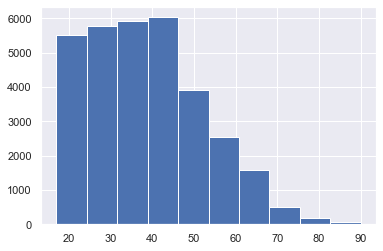

In [31]:
plt.hist(x = 'age',
         data = copy)

plt.show()

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

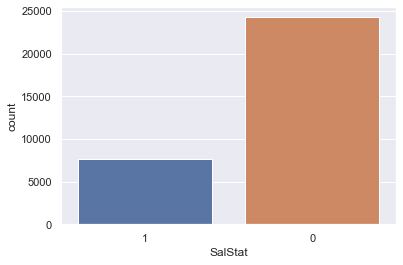

In [123]:
sns.countplot(copy['SalStat'])

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

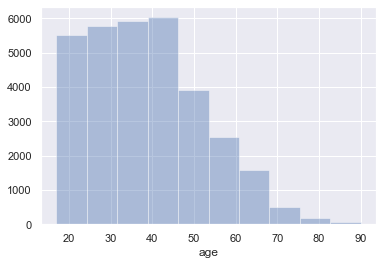

In [124]:
sns.distplot(copy['age'], bins=10, kde=False)

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

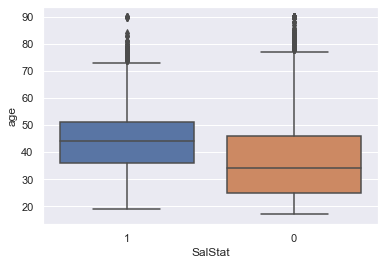

In [125]:
sns.boxplot('SalStat', 'age', data=copy)

In [126]:
copy.groupby('SalStat')['age'].median()

SalStat
1    44.0
0    34.0
Name: age, dtype: float64

In [32]:
copy.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [33]:
pd.crosstab(index = copy['JobType'],
            columns = 'count')

col_0,count
JobType,
Federal-gov,943
Local-gov,2067
Never-worked,7
Private,24095
Self-emp-inc,1074
Self-emp-not-inc,2499
State-gov,1279
Without-pay,14


In [34]:
pd.crosstab(index = copy['occupation'],
            columns = 'count')

col_0,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [35]:
pd.crosstab(index = copy['JobType'],
            columns = copy['SalStat'],
            normalize = True,
            margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
JobType,,,
Federal-gov,0.011414,0.018075,0.029489
Local-gov,0.019044,0.045594,0.064638
Never-worked,0.000000,0.000219,0.000219
Private,0.158328,0.595159,0.753487
Self-emp-inc,0.018763,0.014823,0.033586
Self-emp-not-inc,0.022328,0.055820,0.078147
State-gov,0.010757,0.029239,0.039996
Without-pay,0.000000,0.000438,0.000438
All,0.240634,0.759366,1.000000


In [36]:
pd.crosstab(index = copy['EdType'],
            columns = copy['SalStat'],
            normalize = True,
            margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
EdType,,,
10th,0.001908,0.026893,0.028801
11th,0.001845,0.034649,0.036494
12th,0.000969,0.012071,0.013040
1st-4th,0.000188,0.004910,0.005097
5th-6th,0.000438,0.009507,0.009944
7th-8th,0.001157,0.018450,0.019607
9th,0.000813,0.015010,0.015823
Assoc-acdm,0.008193,0.024798,0.032991
Assoc-voc,0.011164,0.031553,0.042717


# Model building and classifying the income

In [37]:
copy

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [38]:
copy['SalStat'] = copy['SalStat'].map({
    ' less than or equal to 50,000' : 0,
    ' greater than 50,000' : 1
})

In [44]:
new_data = pd.get_dummies(copy)

In [45]:
new_data

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1,SalStat_0
0,45,0,0,28,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,44,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,27,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
31975,23,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [46]:
column_list = new_data.columns

In [47]:
column_list

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek',
       'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Never-worked',
       'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc',
       ...
       'nativecountry_ Scotland', 'nativecountry_ South',
       'nativecountry_ Taiwan', 'nativecountry_ Thailand',
       'nativecountry_ Trinadad&Tobago', 'nativecountry_ United-States',
       'nativecountry_ Vietnam', 'nativecountry_ Yugoslavia', 'SalStat_1',
       'SalStat_0'],
      dtype='object', length=105)

In [48]:
input_cols = list(set(column_list) - set(new_data[['SalStat_0', 'SalStat_1']]))

In [49]:
len(input_cols)

103

In [50]:
x = new_data[input_cols].values

In [121]:
x

array([[ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  1,  0, ...,  0, 44,  0],
       ...,
       [ 0,  1,  0, ...,  0, 23,  0],
       [ 0,  1,  0, ...,  0, 42,  0],
       [ 0,  0,  0, ...,  0, 29,  0]], dtype=int64)

In [54]:
y = copy['SalStat'].values

In [55]:
y

[0, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 31978
Categories (2, int64): [1, 0]

In [67]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.3, random_state=0)

In [68]:
logistic = LogisticRegression()

In [70]:
logistic.fit(train_x, train_y)

C:\Users\tamilzh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
logistic.coef_

array([[-2.33304678e-01, -4.47129787e-02, -4.37032514e-03,
        -3.77335127e-01, -1.26372278e-03,  4.23168862e-01,
        -3.78052012e-01, -1.87294084e-01, -2.64273759e-03,
        -7.61508832e-01, -1.80453174e-03,  3.14721962e-04,
         2.26349130e-04, -1.74859003e-03,  7.01772178e-04,
         3.59099653e-01,  3.39081482e-05,  3.09767320e-03,
         3.38031914e-03, -1.21140955e-01,  3.83006453e-01,
        -7.03751569e-03, -2.49375647e-03, -5.48317830e-04,
        -2.14118269e-01, -4.05809688e-03,  1.92004705e-02,
         6.15070831e-02,  1.51532014e-01,  9.08710450e-03,
        -2.24648483e-03, -6.72911173e-02, -8.21984690e-03,
         1.69184089e-01, -7.36872409e-01,  4.48115357e-01,
        -1.78761454e-01, -1.64223244e-02, -1.12748707e-02,
        -5.31515439e-02, -4.16021747e-02,  4.98099239e-03,
        -2.00237143e-02, -3.41977583e-03,  1.40969688e-03,
        -2.68522706e-01, -6.02051756e-04, -2.02574090e-01,
        -4.43444693e-01, -9.55021698e-03, -3.01984618e-0

In [72]:
logistic.intercept_

array([-0.80972258])

In [74]:
prediction = logistic.predict(test_x)

In [75]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
confusion_matrix(test_y, prediction)

array([[6838,  498],
       [ 997, 1261]], dtype=int64)

In [77]:
accuracy_score(test_y, prediction)

0.8441734417344173

In [79]:
copy.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [87]:
copy = copy.drop(['maritalstatus', 'relationship', 'race', 'nativecountry', 'capitalgain', 'capitalloss'], axis = 1)

In [88]:
copy.columns

Index(['age', 'JobType', 'EdType', 'occupation', 'gender', 'hoursperweek',
       'SalStat'],
      dtype='object')

In [98]:
copy

,age,JobType,EdType,occupation,gender,hoursperweek,SalStat
0,45,Private,HS-grad,Adm-clerical,Female,28,0
1,24,Federal-gov,HS-grad,Armed-Forces,Male,40,0
2,44,Private,Some-college,Prof-specialty,Male,40,1
3,27,Private,9th,Craft-repair,Male,40,0
4,20,Private,Some-college,Sales,Male,35,0
...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Farming-fishing,Male,60,0
31974,34,Local-gov,Some-college,Protective-serv,Female,40,0
31975,23,Private,Some-college,Adm-clerical,Male,40,0
31976,42,Local-gov,Some-college,Adm-clerical,Female,40,0


In [101]:
new_data = pd.get_dummies(copy)

In [102]:
new_data

,age,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,gender_ Female,gender_ Male,SalStat_1,SalStat_0
0,45,28,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,44,40,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,27,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,20,35,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
31974,34,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
31975,23,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
31976,42,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [103]:
new_data.columns

Index(['age', 'hoursperweek', 'JobType_ Federal-gov', 'JobType_ Local-gov',
       'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc', 'JobType_ State-gov',
       'JobType_ Without-pay', 'EdType_ 10th', 'EdType_ 11th', 'EdType_ 12th',
       'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th',
       'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors',
       'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters',
       'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tec

In [105]:
columns_list = list(new_data.columns)
columns_list

['age',
 'hoursperweek',
 'JobType_ Federal-gov',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 10th',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'gender_ Female',
 '

In [106]:
features = list(set(columns_list) - set(['SalStat_1', 'SalStat_0']))

In [107]:
features

['JobType_ Self-emp-not-inc',
 'EdType_ Some-college',
 'occupation_ Tech-support',
 'EdType_ 7th-8th',
 'occupation_ Priv-house-serv',
 'EdType_ Assoc-voc',
 'EdType_ HS-grad',
 'occupation_ Farming-fishing',
 'JobType_ Never-worked',
 'EdType_ Bachelors',
 'occupation_ Handlers-cleaners',
 'occupation_ Craft-repair',
 'EdType_ 9th',
 'occupation_ Prof-specialty',
 'EdType_ 12th',
 'occupation_ Adm-clerical',
 'hoursperweek',
 'EdType_ 1st-4th',
 'occupation_ Sales',
 'JobType_ Self-emp-inc',
 'occupation_ Protective-serv',
 'occupation_ Other-service',
 'occupation_ Armed-Forces',
 'gender_ Male',
 'EdType_ Prof-school',
 'EdType_ Doctorate',
 'EdType_ Assoc-acdm',
 'JobType_ Local-gov',
 'JobType_ Private',
 'EdType_ 10th',
 'EdType_ 11th',
 'EdType_ Preschool',
 'occupation_ Transport-moving',
 'JobType_ State-gov',
 'occupation_ Exec-managerial',
 'gender_ Female',
 'EdType_ 5th-6th',
 'JobType_ Without-pay',
 'JobType_ Federal-gov',
 'occupation_ Machine-op-inspct',
 'age',
 'EdT

In [108]:
x = new_data[features].values

In [109]:
x

array([[ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  1,  0, ...,  0, 44,  0],
       ...,
       [ 0,  1,  0, ...,  0, 23,  0],
       [ 0,  1,  0, ...,  0, 42,  0],
       [ 0,  0,  0, ...,  0, 29,  0]], dtype=int64)

In [111]:
y = copy['SalStat'].values

In [112]:
y

[0, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 31978
Categories (2, int64): [1, 0]

In [113]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [114]:
logistic = LogisticRegression()

In [115]:
logistic.fit(train_x, train_y)

C:\Users\tamilzh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
prediction = logistic.predict(test_x)

In [117]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
confusion_matrix(test_y, prediction)

array([[6813,  523],
       [1287,  971]], dtype=int64)

In [119]:
accuracy_score(test_y, prediction)

0.8113404210965186

# Insights

1. 75 % of people's salary status is <=50,000 
   & 25% of people's salary status is > 50,000
     
2. People with age 20-45 age are high in frequency

3. people with 35-50 age are more likely to earn > 50000 
   people with 25-35 age are more likely to earn <= 50000 
   


# Logistic Regression model's performance

1. With the all columns being considered, the confusion matrix says,

            Actually <=50000 and predicted <=50000  -> 6838
            Actually <=50000  but predicted >50000  -> 498
            Actually >50000 and predicted >50000    -> 997
            Actually >50000 but predicted <=50000   -> 1261
            
       And accuracy was close to 85 percent 
               
        
2. In attempt of increasing accuracy and improving the prediction, some less relevant columns are dropped,


            Actually <=50000 and predicted <=50000  -> 6813
            Actually <=50000  but predicted >50000  -> 523
            Actually >50000 and predicted >50000    -> 1287
            Actually >50000 but predicted <=50000   -> 971
            
       And accuracy was close to 81 percent. The performace is not improved rather it was dropped by close to 4 percent.            

### Finally the model can classify the income of the people (<=50000, >50000) with close to 85% accuracy with all features included, and with close to 81% accuracy by removing insiginificant features 